# Homework Assignment #3

In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
data_path = os.path.join("data", "caseStudyCleaned.csv")

if not os.path.exists(data_path):
    print("Download data first!")

In [54]:
df = pd.read_csv(data_path)
df.head()

,ID,CustomerAgeinmonths,Churn1Yes0No,CHIScoreMonth0,CHIScore01,SupportCasesMonth0,SupportCases01,SPMonth0,SP01,Logins01,BlogArticles01,Views01,DaysSinceLastLogin01
0,1,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
1,2,67.0,0.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,31.0
2,3,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
3,4,63.0,0.0,231.0,1.0,1.0,1.0,3.0,0.0,167.0,8.0,21996.0,0.0
4,5,57.0,0.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0


### 1. Is Wall’s belief about the dependence of churn rates on customer age supported by the data? To get some intuition, try visualizing this dependence (Hint: no need to run any statistical tests).

Text(0, 0.5, 'Churn')

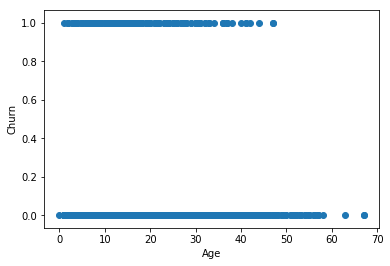

In [18]:
plt.scatter(df['CustomerAgeinmonths'],df['Churn1Yes0No'])
plt.xlabel("Age")
plt.ylabel('Churn')

### 2. To start, run a single regression model that best predicts the probability that a customer leaves.
#### a. What is the predicted probability that Customer 672 will leave between December 2011 and February 2012? Is that high or low? Did that customer actually leave?
#### b. What about Customers 354 and 5,203?

In [79]:
from sklearn.linear_model import LogisticRegression

myLogMod = LogisticRegression(solver = 'lbfgs').fit(np.array([df.CHIScoreMonth0]).T, np.array([df.Churn1Yes0No]).T)
b_1 = myLogMod.coef_
b_0 = myLogMod.intercept_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
print(b_0, b_1)

[-2.46064255] [[-0.00615342]]


### 3. How sensible is the approach with a single model? Can you suggest a better approach?
#### a. Provide updated estimates of probabilities that Customers 672, 354, and 5,203 will leave.
#### b. What factors contribute the most to the predicted probabilities that these customers will leave?

In [74]:
1/ (1 + np.exp(-(-0.0003 * 148 + 0.0752)))
2.04 * np.exp(-11)

3.4071469612101145e-05

### 4. Answer Wall’s “ultimate question”: provide the list of 100 customers with highest churn probabilities and the top three drivers of churn for each customer.